In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

import path

# Load data, view boxes

Let's start by reading in the data set and showing one of the images

In [5]:
train = pd.read_csv('train_with_labels_v3.csv')
train.head()

OutputID  row_1_X_1  row_1_Y_1  row_1_X_2  row_1_Y_2  \
0  Image376_1TPP_4R_PL2.jpg        100       2587       3527       2619   
1   Image208_1TPP_3R_MT.jpg         98        879       1529        894   
2   Image212_1TPP_3R_MT.jpg        100        868       1531        886   
3   Image202_1TPP_3R_MT.jpg        101        874       1531        891   
4   Image242_2TPP_4R_MT.JPG        103       1754       2492       1758   

   row_1_X_3  row_1_Y_3  row_1_X_4  row_1_Y_4  row_2_X_1  \
0       3530       2353        100       2327        100   
1       1532        738        100        721        100   
2       1535        735        105        715        105   
3       1532        749        106        725        103   
4       2502       1586        108       1582        109   

                         ...                          row_11_X_4  row_11_Y_4  \
0                        ...                                   0           0   
1                        ...                                   0           0   
2                        ...                                   0           0   
3                        ...                                   0           0   
4                        ...                                   0           0   

   Type_0  Type_1  Type_2  Type_3  Type_4  Type_5  \
0       1       0       0       0       0       0   
1       1       0       0       0       0       0   
2       1       0       0       0       0       0   
3       1       0       0       0       0       0   
4       1       0       0       0       0       0   

                                       ImageLocation  \
0  https://firebasestorage.googleapis.com/v0/b/la...   
1  https://firebasestorage.googleapis.com/v0/b/la...   
2  https://firebasestorage.googleapis.com/v0/b/la...   
3  https://firebasestorage.googleapis.com/v0/b/la...   
4  https://firebasestorage.googleapis.com/v0/b/la...   

                                        MaskLocation  
0  {"Type0_straight_tray":"https://imagemasks.s3....  
1  {"Type0_straight_tray":"https://imagemasks.s3....  
2  {"Type0_straight_tray":"https://imagemasks.s3....  
3  {"Type0_straight_tray":"https://imagemasks.s3....  
4  {"Type0_straight_tray":"https://imagemasks.s3....  

[5 rows x 97 columns]

In [6]:
name = train['OutputID'].loc[0]
img = plt.imread(f'data/train/{name}')

FileNotFoundError: [Errno 2] No such file or directory: 'data/train/Image376_1TPP_4R_PL2.jpg'

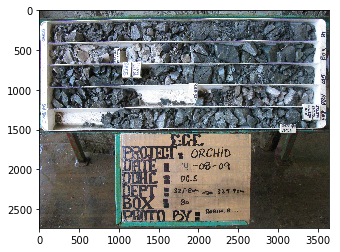

In [22]:
plt.imshow(img)

## Plotting Boxes

Let's explore the data by plotting the boxes ontop of the image. 

Here is a handy function for visualising the data. Note that the Y label needs a transformation


In [24]:
def plot_row(training_path, row):
    """
    Function to plot rows ontop of image
    
    Inputs:
    filepath: A Path object containing the location of the training data. See example. 
    row: A row from the training dataframe

    """
    
    img = plt.imread(training_path+row.OutputID)
    plt.figure()
    fig = plt.imshow(img)
    ax = fig.axes
    for r in range(1,12):
        patch = []
        for i in range(1,5):
            x = row[f'row_{r}_X_{i}']
            y = img.shape[0] - row[f'row_{r}_Y_{i}']
            patch.append([x,y])
        ax.add_patch(patches.Polygon(patch, closed=True, fill=False, linewidth=2,color='red'))

We will use the python standard pathlib to make paths easier. 

Let's grab a random sample from the dataset and visualise them

[None, None, None, None, None, None, None, None, None, None]

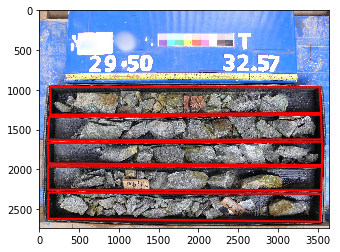

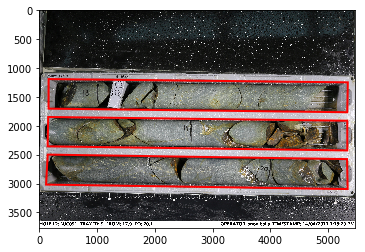

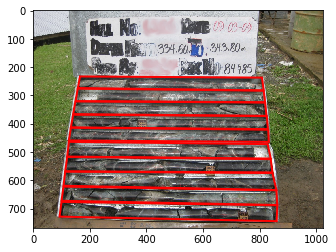

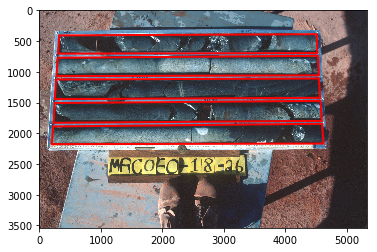

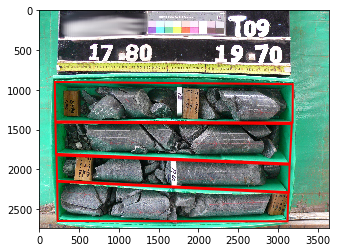

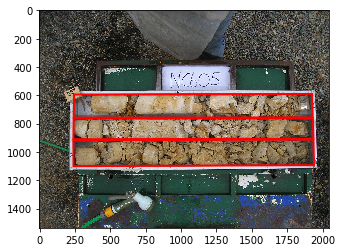

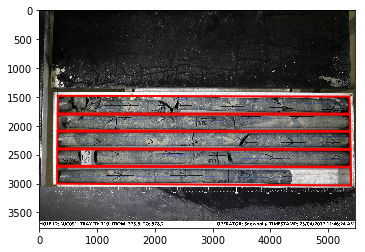

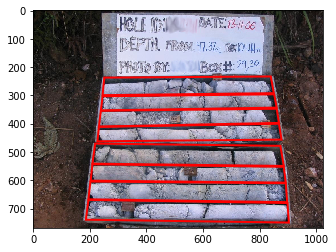

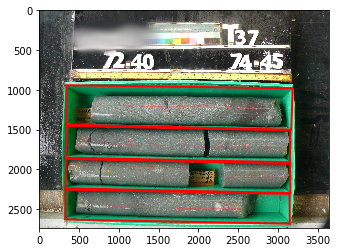

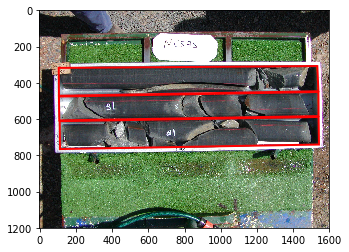

In [25]:
training_path = path.Path('./data/train/')

np.random.seed(32)  # This makes the "random" sample always the same for everyone
number_of_images=10

[plot_row(training_path, train.iloc[i]) 
 for i in np.random.choice(range(train.shape[0]), number_of_images)] # Don't worry if you haven't seen random.choice before
        
    

## Not always rectangles

One interesting thing about this problem is that not all the trays are at the same angle, and some of the trays are distorted. Thus we are specifying a 4-point polygon to determine the target area.  How can you solve this problem? 



# Predicting Classes

Each image also has an associated class, this is to do with the presence or absence of distortions, aspect ratios or bulging boxes. Let's look at examples from the different classes


In [26]:
type_0 = train.query("Type_0 == 1")
type_1= train.query("Type_1 == 1")
type_2= train.query("Type_2 == 1")
type_3= train.query("Type_3 == 1")
type_4= train.query("Type_4 == 1")
type_5= train.query("Type_5 == 1")

In [27]:
type_0.iloc[1]

OutputID                                   Image208_1TPP_3R_MT.jpg
row_1_X_1                                                      100
row_1_Y_1                                                      717
row_1_X_2                                                     1536
row_1_Y_2                                                      736
row_1_X_3                                                     1537
row_1_Y_3                                                      613
row_1_X_4                                                      105
row_1_Y_4                                                      581
row_2_X_1                                                      105
row_2_Y_1                                                      576
row_2_X_2                                                     1538
row_2_Y_2                                                      605
row_2_X_3                                                     1540
row_2_Y_3                                                     

## Type_0

These core trays appear to be nicely positioned in the image, with no distortion. These are straight trays.

[None, None, None, None, None]

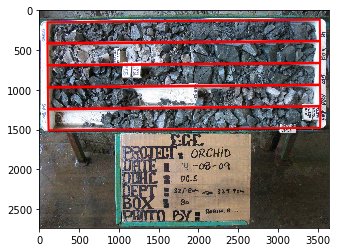

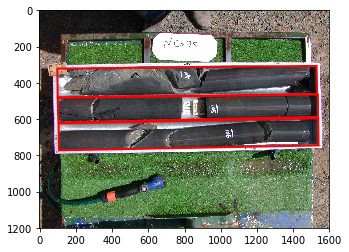

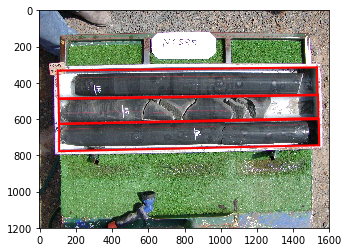

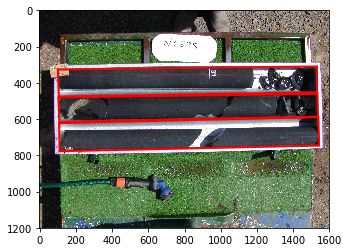

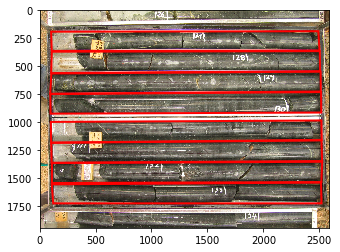

In [28]:
[plot_row(training_path, type_0.iloc[r]) for r in range(5)]

## Type_1

These core trays appear to be slightly mis-aligned in the image

[None, None, None, None, None]

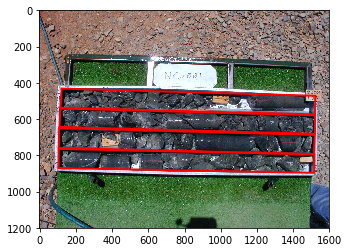

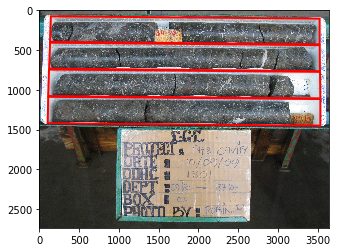

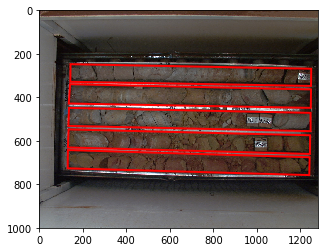

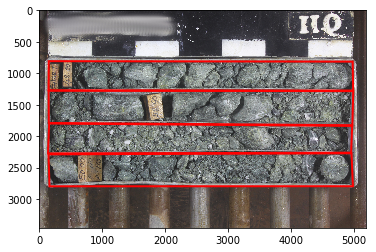

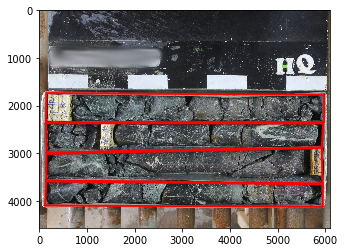

In [29]:
[plot_row(training_path, type_1.iloc[r]) for r in range(5)]

## Type_2

The images is slightly distorted in this class.. 

[None, None, None, None, None]

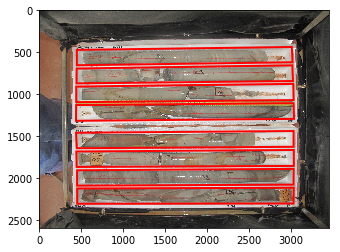

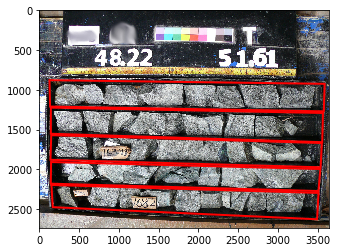

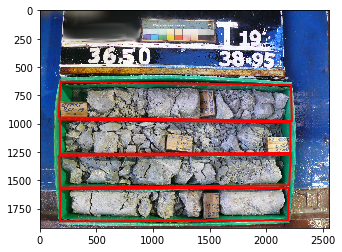

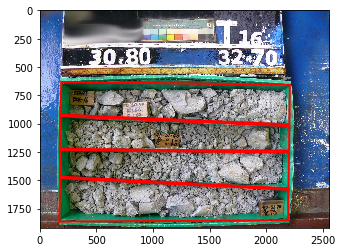

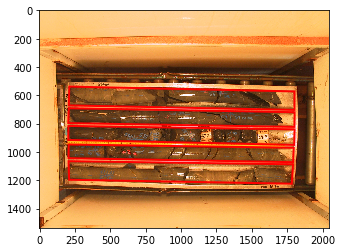

In [30]:
[plot_row(training_path, type_2.iloc[r]) for r in range(5)]

## Type_3


These trays appear to be bent and are also distorted

[None, None, None, None, None]

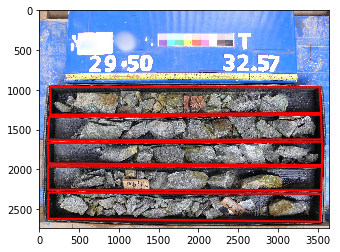

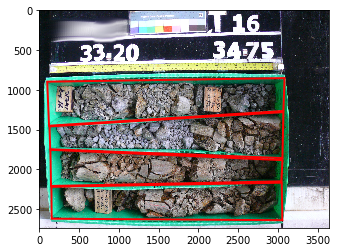

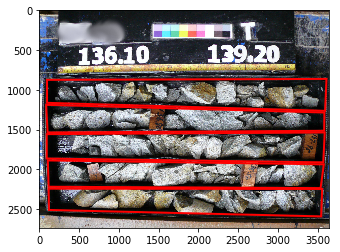

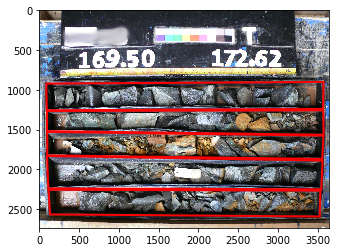

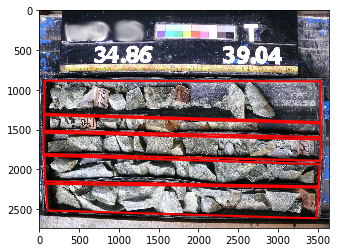

In [31]:
[plot_row(training_path, type_3.iloc[-r]) for r in range(5)]

## Type_4


These images have a low aspect ratio to them

[None, None, None, None, None]

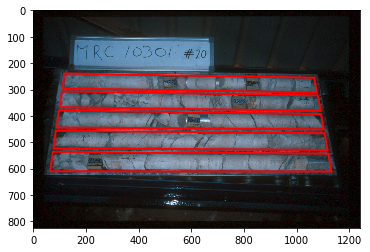

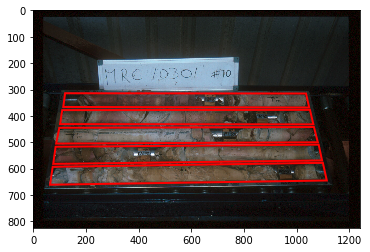

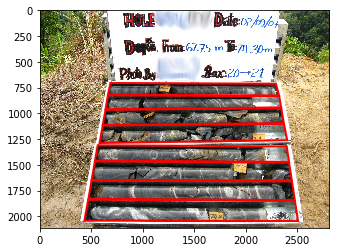

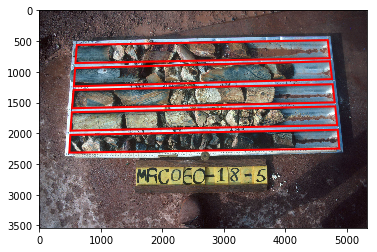

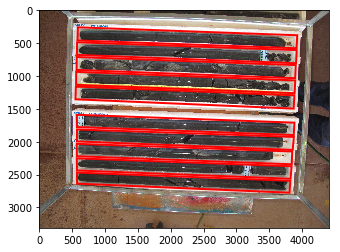

In [32]:
[plot_row(training_path, type_4.iloc[-r]) for r in range(5)]

## Type_5


These images have a low aspect ratio and some rows are also bent. 

[None, None, None, None, None]

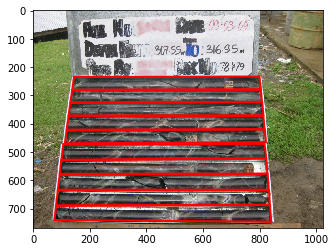

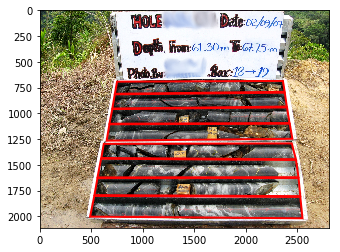

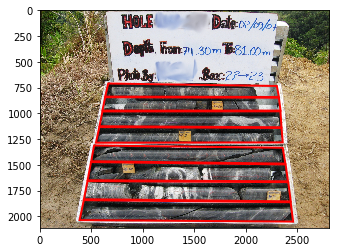

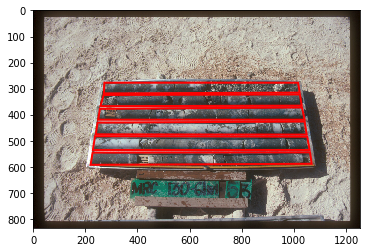

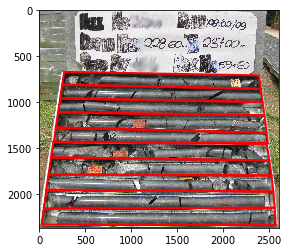

In [34]:
[plot_row(training_path, type_5.iloc[-r]) for r in range(5)]

# Submission format

You must follow this format to submit an entry. 

We will simply submit a prediction for every row which is the mean of all of the columns in the training dataset.

In [41]:
test_names = [t for t in os.listdir('data/test') if 'JPG' in t]

In [43]:
mean_value = train.mean()

In [44]:
submission = pd.DataFrame([mean_value for t in test_names])
submission['OutputID'] = test_names

In [45]:
submission.to_csv('sample_submission.csv', index=False)